### Instagram Impression Analysis By Adelani Muhydeen O.

In [3]:
pip install plotly


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 15.2/15.2 MB 8.8 MB/s eta 0:00:00


In [2]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0
    Uninstalling pip-23.0:
      Successfully uninstalled pip-23.0
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


## Loading the dataset

In [14]:
dataInsta = pd.read_excel("Instagram data.xlsx")

## Checking for NULL values in the dataset

In [15]:
dataInsta.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

# Taking an insight into the dataset to have better understaning of the data type.

In [16]:
dataInsta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Distribution of impression from Home

c:\Users\moade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


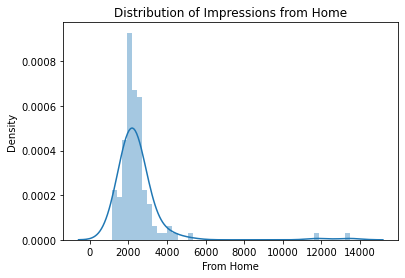

<Figure size 864x720 with 0 Axes>

In [21]:
sns.distplot(dataInsta['From Home'])
plt.title('Distribution of Impressions from Home')
plt.figure(figsize=(12,10))
plt.show()

* The impressions from the home show that it’s hard to reach all the followers daily.


# Distribution of impression from Hashtags

c:\Users\moade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


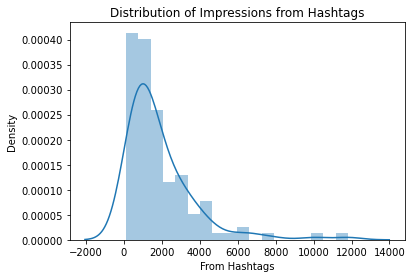

<Figure size 864x720 with 0 Axes>

In [23]:
sns.distplot(dataInsta['From Hashtags'])
plt.title('Distribution of Impressions from Hashtags')
plt.figure(figsize=(12, 10))
plt.show()


* Looking at hashtag impressions shows that not all posts can be reached using hashtags, but many new users can be reached through hashtags.

# Distributioon of impression from Explore

c:\Users\moade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


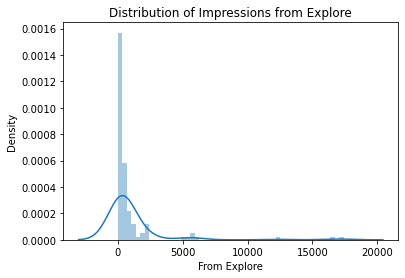

<Figure size 864x720 with 0 Axes>

In [24]:
sns.distplot(dataInsta['From Explore'])
plt.title('Distribution of Impressions from Explore')
plt.figure(figsize=(12, 10))
plt.show()

* Looking at the impressions I have received from the explore section, I can say that Instagram does not recommend our posts much to its users. Some posts have received a good reach from the explore section, but it’s still very low compared to the reach I receive from hashtags.

# Distribution of impression from Other

c:\Users\moade\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


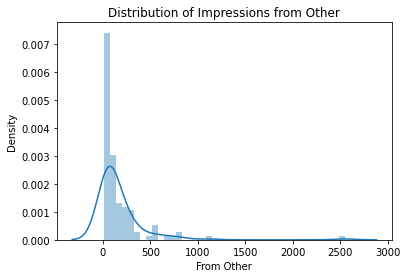

<Figure size 864x720 with 0 Axes>

In [25]:
sns.distplot(dataInsta['From Other'])
plt.title('Distribution of Impressions from Other')
plt.figure(figsize=(12, 10))
plt.show()

* More impressions are reached through other channels as compared to exploring the system of Instagram.


# Percentage of impressions Home, Hashtags, Explore and Other:

In [26]:
Home  = dataInsta["From Home"].sum()
Hashtag = dataInsta["From Hashtags"].sum()
Explore = dataInsta["From Explore"].sum()
Other = dataInsta["From Other"].sum()

dataInsta_Labels = ["From Home", "From Hashtags","From Explore","From Other"]
dataInsta_Values = [Home, Hashtag, Explore, Other]  # Reason why not in apostrope because it stored numerical values.

In [30]:
fig = px.pie(dataInsta, values = dataInsta_Values, names = dataInsta_Labels,
             title='Impressions on Instagram posts from four various sources', hole=0.6)
fig.show()


* The above donut plot shows that almost 44.1 percent of the reach is from home, 33.6 percent is from hashtags, 19.2 percent is from the explore section, and 3.05 percent is from other sources. 

# Analyzing Contents Columns (Caption and hashtags)

### A wordcloud of the caption column to look at the most used words in the caption

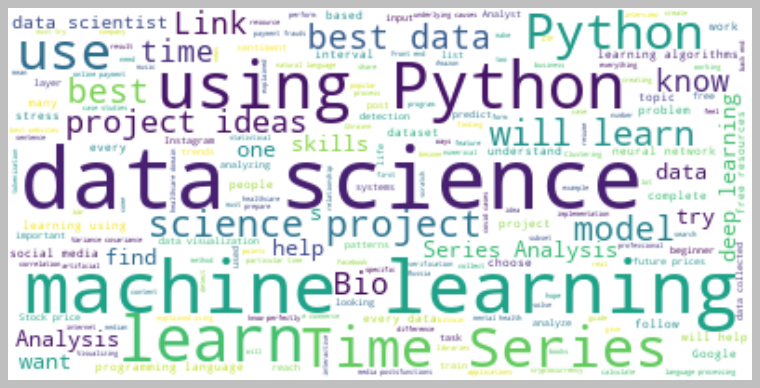

In [31]:
dataInsta_text = " ".join(i for i in dataInsta.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords,
                      background_color= "white").generate(dataInsta_text)
plt.style.use('classic')
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### A wordcloud of the hashtags column to look at the most used words in the hashtags

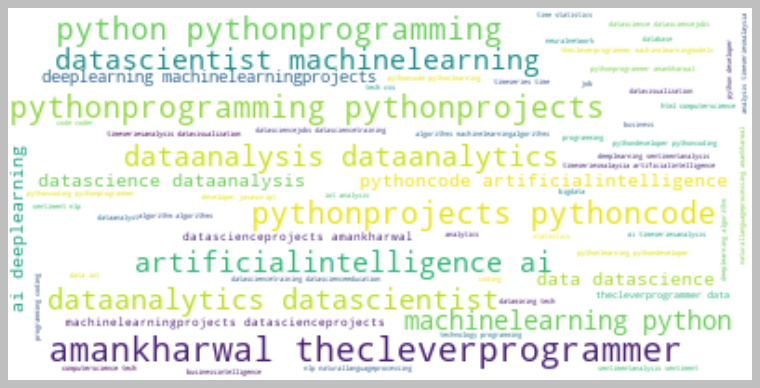

In [33]:
dataInsta_text = " ".join(i for i in dataInsta.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(dataInsta_text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analyzing relationship between impression columns  and likes columns of the instagram posts

In [34]:
figure = px.scatter(data_frame = dataInsta, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

* A linear relationship between the number of likes and the reach can be seen from the plot.

# The relationship between the number of comments and the number of impressions.

In [35]:
figure = px.scatter(data_frame = dataInsta, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

* It looks like the number of comments we get on a post doesn’t affect its reach.

# Let’s have a look at the relationship between the number of shares and the number of impressions.

In [36]:
figure = px.scatter(data_frame = dataInsta, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

* A higher number of shares will result in a higher reach, but shares don’t affect the reach of a post as much as likes do.

# Let’s have a look at the relationship between the number of saves and the number of impressions.

In [37]:
figure = px.scatter(data_frame = dataInsta, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

* There is a linear relationship between the number of times the post is saved and the reach of the Instagram post.

# Correlation analyzes of all the columns with impression column

In [38]:
dataInsta_correl = dataInsta.corr()
print(dataInsta_correl["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


* We can see that more likes and saves will help to get more reach on Instagram. The higher number of shares will also help to get the post more reach, but the post has a negative comment trend with a low correlation.

# Analyzing Conversion Rate

In [39]:
dataInsta_conversion_rate = (dataInsta["Follows"].sum() / dataInsta["Profile Visits"].sum()) * 100
print(dataInsta_conversion_rate)

41.00265604249668


* The conversation rate of the Instagram account is 41 %, which sounds like a very good conversation rate.


### Relationship between the total profile visits and the number of followers gained from all profile visits

In [40]:
figure = px.scatter(data_frame = dataInsta, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

* The relationship between profile visits and followers gained is also linear. 

# Instagram Reach Prediction Mode

In [41]:
x = np.array(dataInsta[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(dataInsta["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [42]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)


0.9234472988153271

In [43]:
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)


array([11856.5277155])